# Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from skimage import io, filters, restoration, util,feature
from skimage.color import rgb2gray

# Read an image

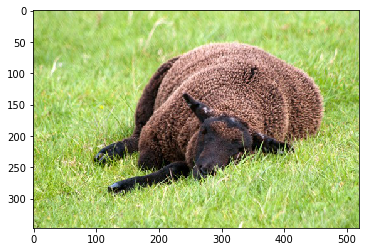

In [2]:
image = io.imread('data/black.jpg')
plt.imshow(image);

# Select a subimage

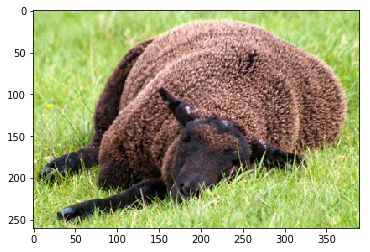

In [3]:
# sheep bottom with colors
subimage=image[40:300,90:480,:]
plt.imshow(subimage);

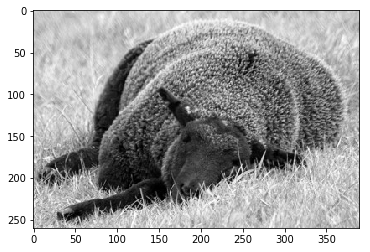

In [4]:
# sheep bottom in grayscale
subimage_gray=rgb2gray(subimage)
plt.imshow(subimage_gray, cmap='gray');

# Apply filters for smoothing and edge detection

## Apply gaussian filter for smoothing

In [5]:
sigma=4 # the bigger the smoother

#colored
gaussian_filter_image=filters.gaussian(subimage, sigma=sigma, multichannel=True, mode="nearest")

#grayscale
gaussian_filter_image_gray=filters.gaussian(subimage_gray, sigma=sigma, multichannel=False, mode="nearest")

## Showing result

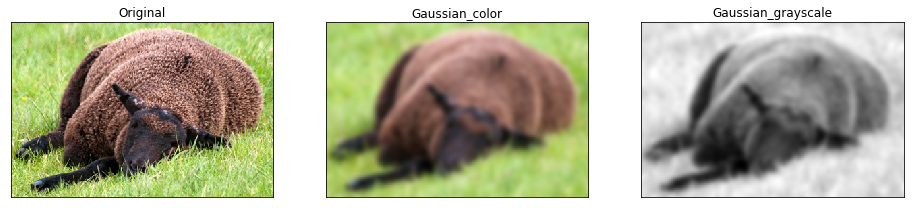

In [6]:
def show_plane(ax, plane, cmap="gray", title=None):
    ax.imshow(plane, cmap=cmap)
    ax.set_xticks([])
    ax.set_yticks([])
    
    if title:
        ax.set_title(title)
_, (a, b, c)= plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
show_plane(a, subimage, title="Original")
show_plane(b, gaussian_filter_image, title="Gaussian_color")
show_plane(c, gaussian_filter_image_gray, title="Gaussian_grayscale")

## Other filters
### bilateral

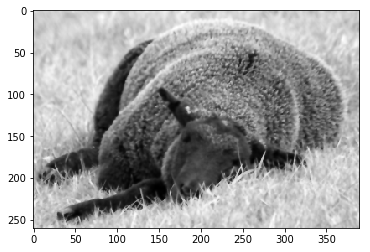

In [7]:
bilateral = restoration.denoise_bilateral(
        subimage_gray, 
        multichannel=False
    )
plt.imshow(bilateral, cmap="gray");

### Median

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


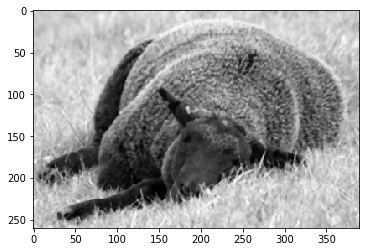

In [8]:
median = filters.median(subimage_gray)
plt.imshow(median, cmap="gray");

## Apply Canny operator for edge detection (on Gaussian filtered image)

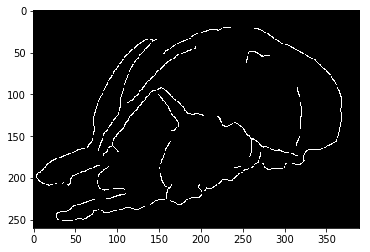

In [9]:
sigma_canny=1
edge=feature.canny(gaussian_filter_image_gray, sigma=sigma_canny)
plt.imshow(edge, cmap='gray');

# Apply a thresholding technique

## Evaluate various thresholding algorithems

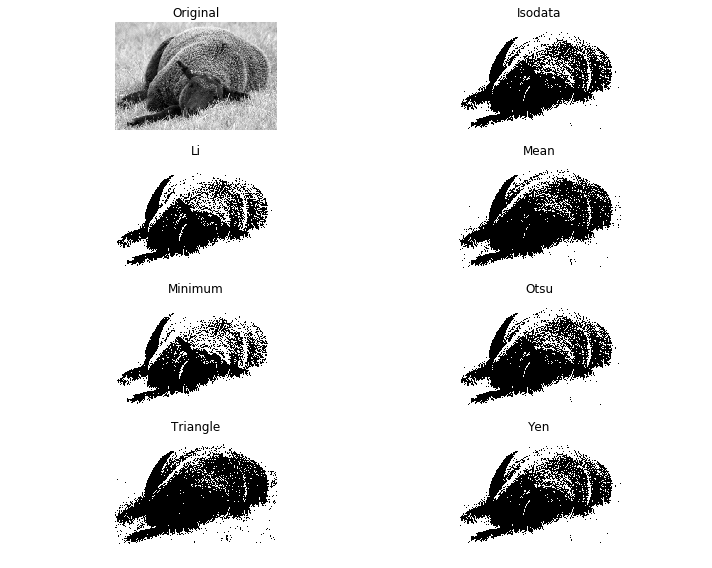

In [10]:
fig, ax=filters.try_all_threshold(subimage_gray, figsize=(10,8), verbose=False)
plt.show()

## Use threshold minimum

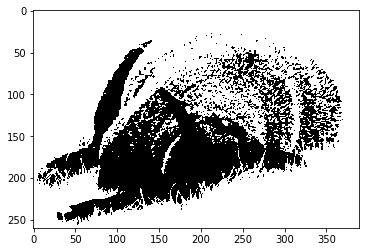

In [11]:
thresh_min=filters.threshold_minimum(subimage_gray)
binary_min=subimage_gray>thresh_min
plt.imshow(binary_min, cmap="gray");